<a href="https://colab.research.google.com/github/qcasey305/Airline_Ratings_Analysis/blob/master/Airline_Ratings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**


**Dataframe Overview**



*   Scraped dataset of Airline reviews from Skytrax (www.airlinequality.com) 
*   41396 total reviews
*   Date range: 2002-01-06 to 2015-08-02
*   Source: [Github](https://github.com/quankiquanki/skytrax-reviews-dataset)




**Data Dictionary**

- airline_name = name of commercial airline
- link = link to review page for airline
- title = '[Airline Name] customer review'
- author = First Initial and Last Name of Reviewer
- author_country = Country of Residence of reviewer
- date = Date review was submitted
- content = content of review (freeform)
- aircraft = Aircraft type
- type_traveller = reason for travel: Business, Couple, Leisure, Family Leisure, Solo Leisure
- cabin_flown = cabin type: Business Class, Economy, First Class, Premium Economy
- route = Departing airport to Arrival airport (freeform)
- overall_rating = overall experience rating (1-10)
- seat_comfort_rating = seat comfort rating (1-10)
- cabin_staff_rating = cabin staff rating (1-10)
- food_beverages_rating = food and beverages rating (1-10)
- inflight_entertainment_rating = in-flight entertainment rating (1-10)
- ground_service_rating = ground service rating (1-10)
- wifi_connectivity_rating = wifi connectivity rating (1-10)
- value_money_rating = airline value for money (1-10)
- recommended = Would you recommend this airline, yes or no (0 or 1)?




**Problem Statement**

What effects do country of residence, cabin type, and reason for travel have on a person's airline review?

**Hypotheses**

1.   There will be a correlation between country of origin of reviewers and average airline reviews.
2.   The more premium the cabin type, the higher the overall rating and seat comfort rating for the airline experience.
3. The less premium the cabin type, the the lower the overall rating and seat comfort rating for the airline experience.
4. However, the less premium the cabin type, the higher the value for money (and vise versa).
5. Solo Leisure and Business travellers will have the highest reviews across the categories.


# **Loading the Dataframe**

**Import Analysis Modules**

In [696]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

print('modules import successful')

modules import successful


**Import CSV**

In [697]:
skytrax_orig = pd.read_csv('https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airline.csv')
reviews = skytrax_orig.copy()
print('dataset loaded successfully')

dataset loaded successfully


**See Description of Dataframe**

In [698]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   41396 non-null  object 
 1   link                           41396 non-null  object 
 2   title                          41396 non-null  object 
 3   author                         41396 non-null  object 
 4   author_country                 39805 non-null  object 
 5   date                           41396 non-null  object 
 6   content                        41396 non-null  object 
 7   aircraft                       1278 non-null   object 
 8   type_traveller                 2378 non-null   object 
 9   cabin_flown                    38520 non-null  object 
 10  route                          2341 non-null   object 
 11  overall_rating                 36861 non-null  float64
 12  seat_comfort_rating            33706 non-null 

**Preview one row of Dataframe**

In [699]:
print(reviews.iloc[0])

airline_name                                                         adria-airways
link                                                /airline-reviews/adria-airways
title                                                Adria Airways customer review
author                                                                       D Ito
author_country                                                             Germany
date                                                                    2015-04-10
content                          Outbound flight FRA/PRN A319. 2 hours 10 min f...
aircraft                                                                       NaN
type_traveller                                                                 NaN
cabin_flown                                                                Economy
route                                                                          NaN
overall_rating                                                                   7
seat

**See total number of Airlines are featured in the Dataframe.**



In [700]:
len(reviews.airline_name.unique())

362

**See total number of reviewer countries of residence are featured in the Dataframe.**

In [701]:
len(reviews.author_country.unique())

159

# **Clean the Dataframe**

**Delete the link column and the title column as they are not necessary in our analysis.**

In [0]:
reviews.drop(columns=['link', 'title'], inplace=True)
#note: inplace = True will permanently change the Dataframe order

**Sort the Dataframe by overall rating in descending order.**

In [0]:
reviews.sort_values(by=['overall_rating'], ascending=False, inplace=True, na_position='last')
#note: inplace = True will permanently change the Dataframe order

**Delete row with invalid date**

In [0]:
reviews.drop(index = 11620, inplace = True)
#index 11620 showed date 1970-01-01

**Set Seaborn aesthetics**

In [0]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

# **Analysis**

**Find the mean, median, and mode of overall rating for the entire Dataframe**

In [706]:
print('The overall rating mean is', reviews['overall_rating'].mean())
print('The overall rating median is', reviews['overall_rating'].median())
print('The overall rating mode is', reviews['overall_rating'].mode())
#bimodal

The overall rating mean is 6.0395822029300055
The overall rating median is 7.0
The overall rating mode is 0    10.0
dtype: float64


**Plot the overall ratings of the Dataframe in a simple histogram to see a visual representations of the distribution (with and without KDE).**

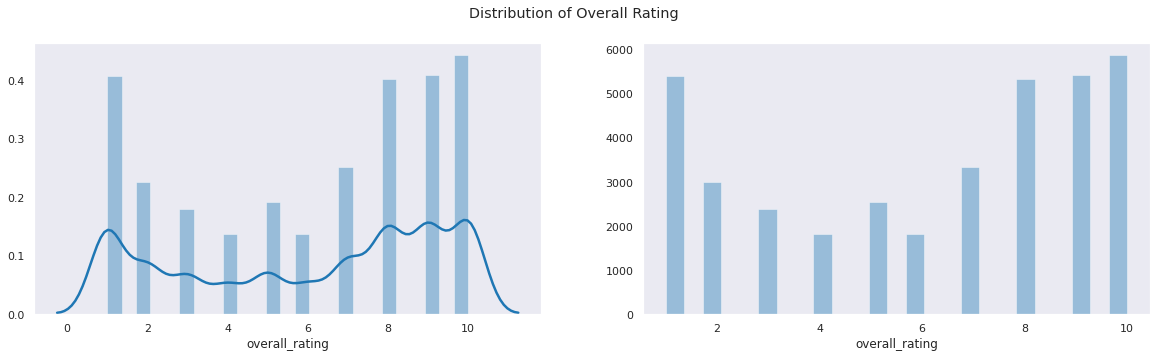

In [707]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
fig.suptitle('Distribution of Overall Rating')
sns.distplot(reviews['overall_rating'], ax=ax1)
sns.distplot(reviews['overall_rating'], kde=False, ax=ax2)

plt.show()

#bimodal / sort of left-skewed distribution

**Find the most frequently used words in the Content column.**

In [708]:
dont_include = ['the','The','Flight','flight','a','A','I','i','on','in','of','to', 'for','had','it','that','this','we','We','would','which','and','with','were','not','but','at','from','as','be','-','no','No','like','what','My','was','is','have','they','you','an','are','my','our','very','all','so','or','by','one','their','there','me','get','us','back','more','when','other','about','will','them','if','up','could','been','both','before','then','On','again','do','because','can','next','use','quite']
#get rid of filler words

freeform_reviews = reviews.content.str.cat(sep=' ')

split_it = []

for word in freeform_reviews.split():
  if word in dont_include:
    pass
  else:
    split_it.append(word)

Counter = Counter(split_it)
most_occur = Counter.most_common(100)

print(most_occur)

[('service', 17084), ('time', 16167), ('good', 16039), ('seats', 15137), ('food', 13945), ('seat', 13477), ('crew', 12810), ('flights', 12797), ('only', 12259), ('staff', 11855), ('plane', 10418), ('out', 9862), ('than', 9476), ('cabin', 9473), ('hours', 9170), ('flight.', 9143), ('fly', 9124), ('airline', 8964), ('return', 8622), ('hour', 7869), ('did', 7550), ('class', 7345), ('airport', 7199), ('passengers', 7028), ('even', 6984), ('just', 6951), ('entertainment', 6932), ('2', 6621), ('after', 6343), ('first', 6326), ('Air', 6305), ('friendly', 6230), ('business', 6152), ('delayed', 6103), ('new', 6022), ('leg', 5953), ('told', 5881), ('comfortable', 5855), ('any', 5810), ('boarding', 5731), ('They', 5712), ('some', 5694), ('check', 5553), ('got', 5503), ('meal', 5339), ('much', 5304), ('again.', 5274), ('aircraft', 5271), ('over', 5196), ('way', 5188), ('experience', 5173), ('flew', 5149), ('great', 5127), ('minutes', 5120), ('3', 5051), ('This', 5034), ('off', 5011), ('arrived', 4

**Understand the audience breakdown of the Dataframe.**

Create a histogram of number of reviews by country.

In [0]:
reviews['author_country'].value_counts().plot(kind='bar', figsize=(25, 10), color='#7b2fff')
plt.ylabel('Number of Reviewers in Country')
plt.xlabel('Countries')
plt.title('Number of Reviews per Country');

**Create a pivot table that depicts overall rating by country.**

In [0]:
reviews.groupby('author_country')[['overall_rating']].mean().dropna().sort_values(by=['overall_rating'], ascending=False, inplace=False, na_position='last')
#Take out the countries with Null for overall rating


**Level of Country Travel per Capita vs. Airline Ratings**

According to [World Atlas](https://www.worldatlas.com/articles/countries-whose-citizens-travel-the-most.html), these are the countries who travel the most (i.e. highest number of trips per person per year):
*   Finland
*   USA
- Sweden
- Denmark
- Norway
- Hong Kong
- New Zealand
- Canada
- Australia
- France

> Are reviewers  from these top travel countries more critical than average?




In [0]:
gb = reviews.groupby('author_country')
finland = gb.get_group('Finland')

print('The Finland mean rating for overall rating is', finland['overall_rating'].mean())
print('The Finland mean rating for cabin staff rating is', finland['cabin_staff_rating'].mean())
print('The Finland mean rating for food and beverage rating is', finland['food_beverages_rating'].mean())
print('The Finland mean rating for in-flight entertainment rating is', finland['inflight_entertainment_rating'].mean())

In [0]:

print('The Dataframe mean rating for overall rating is', reviews['overall_rating'].mean())
print('The Dataframe mean rating for cabin staff rating is', reviews['cabin_staff_rating'].mean())
print('The Dataframe mean rating for food and beverage rating is', reviews['food_beverages_rating'].mean())
print('The Dataframe mean rating for in-flight entertainment rating is', reviews['inflight_entertainment_rating'].mean())

How do Finland's means for these categories stack up to the Dataframe means?

- Finland's mean for *overall rating* **>** Dataframe's mean for *overall rating*
- Finland's mean for *cabin_staff_rating* **>** Dataframe's mean for *cabin_staff_rating*
- Finland's mean for *food_beverages_rating* **=** Dataframe's mean for *inflight_entertainment_rating*





**Country of Reviewer vs. Airline Ratings**
> Let's grab the top 10 countries with the most reviewers. These will be more statistically significant. 

In [0]:
top_10_countries = reviews['author_country'].value_counts().head(10).index

def check_country(country):
  return country in top_10_countries

filtered = reviews['author_country'].apply(check_country)

reviews[filtered].groupby('author_country')[['overall_rating', 'seat_comfort_rating','cabin_staff_rating','food_beverages_rating','inflight_entertainment_rating']].mean().plot.bar(figsize=(40, 10), title = 'Mean Reviews of Top 10 Countries')

**Cabin Class Ratings**

In [0]:
pd.DataFrame(reviews.pivot_table(index=('cabin_flown'),values=['overall_rating','seat_comfort_rating','value_money_rating'], aggfunc = 'mean').unstack())

In [0]:
sns.barplot(x='cabin_flown', y='overall_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Rating by Cabin Flown')
plt.show()

In [0]:
sns.barplot(x='cabin_flown', y='seat_comfort_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Seat Comfort Rating by Cabin Flown')
plt.show()

In [0]:
sns.barplot(x='cabin_flown', y='value_money_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Value for Money Rating by Cabin Flown')
plt.show()

**Traveller Type Ratings**

In [0]:
pd.DataFrame(reviews.pivot_table(index=('type_traveller'),values=['overall_rating','seat_comfort_rating','food_beverages_rating','inflight_entertainment_rating'], aggfunc = 'mean').unstack())


In [0]:
sns.barplot(x='type_traveller', y='overall_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Overall Rating by Traveller Type')
plt.show()

In [0]:
sns.barplot(x='type_traveller', y='seat_comfort_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Seat Comfort Rating Rating by Traveller Type')
plt.show()

In [0]:
sns.barplot(x='type_traveller', y='food_beverages_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average Food and Beverages Rating Rating by Traveller Type')
plt.show()

In [0]:
sns.barplot(x='type_traveller', y='inflight_entertainment_rating', data=reviews, estimator=np.mean, ci=None)
plt.title('Average In-Flight Entertainment Rating Rating by Traveller Type')
plt.show()

# **Insights**


- In terms of average review for the entire Dataframe, the function is **bimodal** -- 0 and 10 are the most frequent answers. One can infer that **people are more likely to review if they have an extreme opinion** (whether positive or negative) rather than those who have had an average experience.
- Some of the **most frequently used words** in the content freeform section were: ('**service**', 17084), ('**good**', 16039), ('**seats**', 15137),('**food**', 13945), ('**crew**', 12810), ('**entertainment**', 6932), ('**friendly**', 6230),  ('**attendants**', 3738),  ('**excellent**', 4216),  ('**comfortable**', 5855). A majority of the most frequently used descriptive words have a **positive** connotation. 

*   Although **Finland travels the most per capita**, their average reviews fall very close to or above the averages for the entire Dataframe. **Reviewers from Finland are not necessarily more critical of airlines**. *(Note: we cannot draw definitive conclusions from just one example)*.

 
*   Mean ratings across the top 10 countries with the most reviewers are very similar across the board. This may indicate that **country of residence of reviewer does not affect the criticality of their reviews.** However, Canada and the United States do have slightly lower means compared to the other countries.

- In terms of Cabin Flown: 1. Reviewers who flew **First Class** had the **highest average overall rating and seat comfort rating** / 2. Reviewers who flew **Economy** had the **lowest average seat comfort rating** / 3. Reviewers who flew **Premium Economy** had the **lowest average overall rating** / 4. **Business class** had the **highest value for money rating**, while **Economy & Premium Economy had the lowest**.

- In terms of Reason for Travelling: 1. Reviewers who travelled for **solo leisure had the highest average ratings** for each metric / 2. Reviewers who travelled for **Business** had the **lowest average ratings for each metric *except* seat comfort (2nd highest)**.
